In [2]:
import pandas as pd

Za začetek shranimo podatke o knjigah, žanrih in nagradah v nove spremenljivke. Za indeksni stolpec pri vseh treh izberem "id_knjige". Ta je določen enolično, saj ga vsaka knjiga dobi glede na mestno na lestvici, mesta pa se ne ponavljajo.

Opomba: Če kdaj želimo sortirati po "score", je vseeno če sortiramo po id_knjige, saj "score" določi mesto knjige na lestvici (knjiga z najvišjim se nahaja na prvem mestu).

In [3]:
knjige = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzene_knjige.csv', index_col='id_knjige')

In [6]:
knjige

,knjiga,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade
id_knjige,,,,,,,,,,,,,
1,The Hunger Games,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True
2,Harry Potter and the Order of the Phoenix,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True
3,To Kill a Mockingbird,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True
4,Pride and Prejudice,Jane Austen,1265,False,"Since its immediate success in 1813, has re...",2000,Modern Library,4.27,2035385,20982,3111901,68689,False
5,Twilight,Stephenie Meyer,941441,True,About three things I was absolutely positive. ...,2006,"Little, Brown and Company",3.61,1472928,15012,5135962,106204,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,Fantasy Lover,Sherrilyn Kenyon,4430,True,Cursed into an eternity of slavery by his own ...,2002,St. Martin's Press,4.16,7881,103,86299,3754,True
897,Silas Marner,George Eliot,173,False,George Eliot's tale of a solitary miser gradua...,2005,Simon Schuster,3.65,7878,125,76946,3704,False
898,The Fountainhead,Ayn Rand,432,False,The revolutionary literary vision that sowed t...,1996,Signet Book,3.87,7871,96,301168,12368,False


In [7]:
zanri = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzeni_zanri.csv',index_col='id_knjige')

In [8]:
zanri

,zanr
id_knjige,
1,young-adult
1,fiction
1,dystopia
2,fantasy
2,young-adult
...,...
899,young-adult
899,romance
900,fantasy


In [9]:
nagrade = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzene_nagrade.csv',index_col='id_knjige') 

In [10]:
nagrade

,nagrada
id_knjige,
1,Locus Award Nominee for Best Young Adult Book
1,Georgia Peach Book Award
1,Buxtehuder Bulle
1,Golden Duck Award for Young Adult
1,Grand Prix de l'Imaginaire Nominee for Roman j...
...,...
895,Goodreads Choice Award for Fantasy
896,HOLT Medallion by Virginia Romance Writers Nom...
896,"PRISM Award by Fantasy, Futuristic and Paranor..."


# Kateri žanri so najbolj priljubljeni?

Ugotoviti želim, kateri žanri so najbolj priljubleni med prvimi pettisočimi knjigami.<br>
Ker se lahko zgodi, da je začetnih nekaj sto knjig(najbolje ocenjene) večinoma enega žanra, večinski preostanek pa drugega, bom analizirala najbolj priljubljen žanr za prvih 100, 1000 in 5000 knjig. S tem želim preveriti tudi ali nek žanr prevladuje na celotni lestvici ali pa je prisoten zgolj na vrhu in se kasneje porazdeli z drugimi žanri.<br>
Ugotoviti želim tudi priljubljenost žanra glede na desetletje izdaje del:<br>
TO DO:morda porazdelitev vodilnega znra po letih/porazdelitev vodilnih treh zanrv po desetletjih<br>
Ker pri vsaki knjigi zajamem tri žanre, moram za prvih 100 knjig torej vzeti prvih 300 žanrov. Podobno za 1000 in 5000 knjig.

In [11]:
priljubljeni_zanri_100 = zanri.head(300).groupby('zanr').size().to_frame('st_zanrov').sort_values('st_zanrov', ascending=False)

In [12]:
priljubljeni_zanri_100.head(10)

,st_zanrov
zanr,
fiction,91
classics,63
fantasy,25
young-adult,21
historical-fiction,18
romance,10
science-fiction,9
childrens,7
horror,6


Med prvimi stotimi knjigami sta torej najbolj priljubljena fikcija(fiction) in klasika(classics), sledijo fantastika(fantasy), literatura za mlade(young-adult, 12-18 let) in zgodovinska fikcija(historical-fiction).

Poglejmo ali se priljubljenost zanrov spremni, ko pogledamo širše po lestvici.

In [45]:
priljubljeni_zanri_1000 = zanri.head(3000).groupby('zanr').size().to_frame('st_zanrov').sort_values('st_zanrov', ascending=False)

In [51]:
priljubljeni_zanri_1000.head(10)

,st_zanrov
zanr,
fiction,617
fantasy,282
young-adult,264
classics,241
romance,156
historical-fiction,127
contemporary,127
science-fiction,80
non-fiction,75


In [47]:
priljubljeni_zanri_5000 = zanri.head(15000).groupby('zanr').size().to_frame('st_zanrov').sort_values('st_zanrov', ascending=False)

In [52]:
priljubljeni_zanri_5000.head(10)

,st_zanrov
zanr,
fiction,1216
fantasy,526
classics,520
young-adult,485
romance,286
historical-fiction,259
contemporary,220
science-fiction,145
non-fiction,144


TO DO:komentar priljubljenosti zanrov za 1000 in 5000

TO DO:ali priljubljenost zanra soupada z nagradami

# Ali med priljubljenemi knjigami prevladujejo serije?

Zanima nas tudi ali so bolj priljubljene serije ali posamezne knjige. 
možnost1:isto kot za zanre
moznost2:naredimo graf: y1= serije, x = vse knjige- in se y2 = ne serije, x=vse knjige->tist ki je zgoraj je večji

Za začetek poglejmo, kaj prevladuje med prvimi stotimi knjigami

In [13]:
knjige.head(100).groupby('serija').size()

serija
False    61
True     39
dtype: int64

Med knjigami na vrhu lestvice torej pravladujejo "solo" knjige. Upoštevati velja, da je npr. serija žanra fantastika/fikcija zelo pogosta, medtem ko je veliko redkejša pri klasikah.<br>
Pri žanrih smo videli, da sta si pri prvih stotih knjigah klasika in fikcija precej blizu, fantazija pa je na tretjem mestu s precjšnjim zaostankom, pri večjem številu knjig pa začne očitno prevladovati fikcija, klasika in fantazija pa sta precej izenačeni.<br>
Poglejmo si, če se delež serij poveča, če povečamo število knjig(fikcija je zdaj prevladujoči žanr, klasika in fantazija pa sta izenačei).

In [53]:
knjige.groupby('serija').size()

serija
False    941
True     959
dtype: int64

Vidimo, da sta tipa pri...<br>
Narišimo še graf, da vidmo spreminjanje količine serij in posameznih del po lestvici.
TO DO:GRAF

Sedaj narišimo grafa, ki ponazarjata število serij in posameznih del glede na število vseh knjig.<br>
Primer: Prva tri dela z lestvice so serije, četrto pa je posamezno delo. graf serij bo torej do vključno števila tri potekal po simetrali lihih kvadrantov, pri številu 4(štiri knjige), pa bo vrednost na y osi enaka 3(tri dela od štirih so serije).
Graf pozameznih del bo do vključno števila tri imel vrednost y osi enako nič, pri številu štiri pa ena.<br>
Če je torej na nekem delu graf serij nad grafom posameznih del to pomeni, da na tistem delu prevladujejo serije.<br>
Vsota grafov nam seveda vedno da simetralo lihih kvadrantov.

Definirati moramo funkciji, ki bosta šteli število serij in posameznih del glede na število vseh del.<br>
Spletna stran s podatki je pri nekaterih delih "sesuta", zato posameznih del s strani ni med našimi podatki. Id-ji knjig so podani glede na mesto na lestvici, tako da nam lahko nekaj id-jev manjka (nimamo vseh števil od 1 do 5000). Pri vpeljavi funkcij za štetje bi bilo to precej nerodno, zato vpeljemo "knjige2", pri katerih za indeksni stolpec vzamemo avtomatko generiran stolpec stevil od 0 do dolžine tabele. Pri definiranju funkcij in risanju grafa bomo namesto z id_knjige torej delali s tem stolpcem.

In [73]:
knjige2 = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzene_knjige.csv')

In [95]:
knjige2.head(5)

,knjiga,id_knjige,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade
0,The Hunger Games,1,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True
1,Harry Potter and the Order of the Phoenix,2,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True
2,To Kill a Mockingbird,3,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True
3,Pride and Prejudice,4,Jane Austen,1265,False,"Since its immediate success in 1813, has re...",2000,Modern Library,4.27,2035385,20982,3111901,68689,False
4,Twilight,5,Stephenie Meyer,941441,True,About three things I was absolutely positive. ...,2006,"Little, Brown and Company",3.61,1472928,15012,5135962,106204,True


Definiramo funkciji, ki štejeta serije in posamezna dela.<br>
Funkciji za vsako delo v seznam zapišeta, koliko del nad delom(vključno s trenutnim delom) je serija/posamezno delo.

In [107]:
def stej_serije(x):
    sez = []
    for i in range(0,x):
        if i == 0:
            if knjige2.serija[i]==True:
                sez+=[1]
            else:
                sez.append(0)
        else:
            if knjige2.serija[i]==True:
                sez+=[sez[i-1]+1]
            else:
                sez+=[sez[i-1]]
    return sez
    

In [122]:
def stej_solo(x):
    sez = []
    for i in range(0,x):
        if i == 0:
            if knjige2.serija[i]==False:
                sez+=[1]
            else:
                sez.append(0)
        else:
            if knjige2.serija[i]==False:
                sez+=[sez[i-1]+1]
            else:
                sez+=[sez[i-1]]
    return sez

Najprej narišimo grafa za prvih sto del.

In [181]:
a = stej_serije(100)

In [180]:
b = stej_solo(100)

In [182]:
s= [i for i in range(1, len(a)+1)]

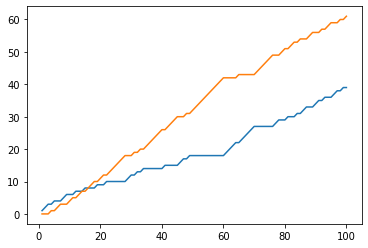

In [183]:
from matplotlib import pyplot as plt
plt.plot(s,a)
plt.plot(s,b)

Oranžen graf predstavlja posamezna dela, moder pa serije. Vidimo, da med primližno prvimi petnajstimi deli prevladujejo serije, nato pa je delež posameznih del večji (v prejšnjih izračunih smo videli, da je razmerje posameznih del proti serijam v prvi stoterici približno 6:4.<br>
Sedaj si poglejmo, kako se količini spreminjata skozi celotno lestvico.

In [184]:
a_cel = stej_serije(len(knjige2))

In [185]:
b_cel = stej_solo(len(knjige2))

In [186]:
s_cel= [i for i in range(1, len(knjige2)+1)]

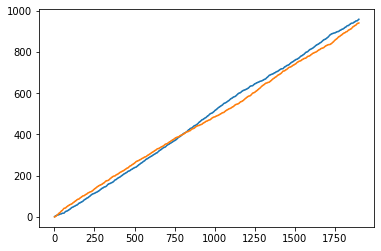

In [187]:
plt.plot(s_cel,a_cel)
plt.plot(s_cel,b_cel)

Vidimo, da je delež serij in posameznih del približno enak. Na začetku rahlo prevladujejo posamezna dela, kasneje pa serije. Zdi se torej, da dejstvo, da je delo del serije ali ne, ne vpliva splošno priljubljenost dela(med najbolj priljubljenimi deli je približno polovica serij in polovica posameznih del).

Poglejmo še, pri katerem tipu je povprečna ocana bralcev višja(ocena od 1 do 5).<br>
Opomba: Prej smo analizirali glede na score, v katerem so združeni st_reviewov, povprecna_ocena, st_glasov, st_ocen...

In [128]:
povprecna_ocena_serije = knjige[knjige.serija == True].povprecna_ocena.mean()

In [129]:
povprecna_ocena_solo = knjige[knjige.serija == False].povprecna_ocena.mean()

In [130]:
povprecna_ocena_serije

4.103274244004171

In [131]:
povprecna_ocena_solo

4.0401062699256105

Povprečna ocena serij je torej za malenkost višja, toda razlika je zanemarljiva(0,05 točke). Ocena bralcev je torej praktično ista za serije in posamezna dela.

Glede na našo analizo lahko torej zaključimo, da je bralcem vseeno ali berejo serije ali posamezna dela.

# Kateri avtorji in založbe so imeli največ uspešnic?

ideja:najti najbolj uspesnega avtorja pri najbolj priljubljenih zanrih
Znova bomo najuspešnejšega avtorja poiskali v različno velikih skupinah: 100, 1000 in 10000 knjig.

In [132]:
st_knjig_avtorja_100 = knjige[['avtor','id_avtor']].head(100).groupby('id_avtor').size().to_frame('st_knjig').sort_values('st_knjig', ascending=False)

In [133]:
st_knjig_avtorja_100

,st_knjig
id_avtor,
1077326,4
3706,2
569,2
656983,2
239579,2
...,...
3389,1
3347,1
3190,1


In [134]:
knjige[['avtor','id_avtor']]

,avtor,id_avtor
id_knjige,,
1,Suzanne Collins,153394
2,J.K. Rowling,1077326
3,Harper Lee,1825
4,Jane Austen,1265
5,Stephenie Meyer,941441
...,...,...
896,Sherrilyn Kenyon,4430
897,George Eliot,173
898,Ayn Rand,432


In [135]:
najboljsi_avtorji_100 = pd.merge(st_knjig_avtorja_100,knjige[['avtor','id_avtor']],left_on='id_avtor',right_on='id_avtor')

In [136]:
najboljsi_avtorji_100.drop_duplicates(keep='last').sort_values('st_knjig',ascending=False)

,id_avtor,st_knjig,avtor
10,1077326,4,J.K. Rowling
17,569,2,Khaled Hosseini
26,656983,2,J.R.R. Tolkien
37,239579,2,Charles Dickens
42,3137322,2,Fyodor Dostoyevsky
...,...,...,...
160,2778055,1,Kurt Vonnegut Jr.
154,4037220,1,Miguel de Cervantes Saavedra
153,4039811,1,Veronica Roth
148,7128,1,Jodi Picoult


J.K.Rowlin je torej napisala kar 4 izmed stotih najbolje ocenjenih knjig spletne strani....

TO DO:poiskati avtorja in zalozbo z najvec nagradami

Sedaj poiščimo še najbolj uspešno založbo.

In [137]:
st_knjig_zalozbe_100 = knjige[['zalozba']].head(100).groupby('zalozba').size().to_frame('st_knjig').sort_values('st_knjig', ascending=False)

In [138]:
st_knjig_zalozbe_100

,st_knjig
zalozba,
Penguin,4
Penguin Books,4
Ballantine Books,4
"Little, Brown and Company",3
Scribner,2
...,...
Grand Central Publishing,1
"Farrar, Straus and Giroux",1
Ember,1


# Ali obstaja časovno obdobje, v katerem je izšla večina knjig iz vrha seznama?


In [139]:
st_knjig_po_letih = knjige.groupby('leto').size().to_frame('st_knjig_letno')

<AxesSubplot:xlabel='leto'>

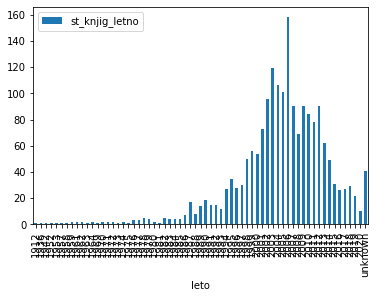

In [140]:
st_knjig_po_letih.plot.bar()

# Ali so knjige z literarnimi nagradami tudi med bralci bolje ocenjene?
Želim preveriti ali bralci knjigam z literarnimi nagradami v povprečju dajo višjo oceno, kot tistim brez nagrad. Želim tudi preveriti, ali povprečna ocena s številom nagrad narašča.

Za začetek poglejmo, ali je med knjigami več knjig z nagradami ali brez.

In [141]:
knjige.groupby('nagrade').size()

nagrade
False     817
True     1083
dtype: int64

Večina knjig s seznama je torej prejela vsaj eno nagrado

In [142]:
povprecna_ocena_z_nagrado = knjige[knjige.nagrade == True].povprecna_ocena.mean()

In [143]:
povprecna_ocena_z_nagrado

4.078282548476454

In [144]:
povprecna_ocena_brez_nagrade = knjige[knjige.nagrade == False].povprecna_ocena.mean()

In [145]:
povprecna_ocena_brez_nagrade

4.063647490820073

Vidimo, da je ocena prvih sto knjig praktično ista za knjige z nagradami in knjige brez nagrad.
Poglejmo ali se situacija spremeni, ko pogledamo večje število knjig.

Sedaj si oglejmo ali se ocena nagrajenih knjig spreminja s stevilom nagrad

In [146]:
nagrajene_knjige = knjige[knjige.nagrade == True]

In [147]:
nagrajene_knjige

,knjiga,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade,st_nagrad
id_knjige,,,,,,,,,,,,,,
1,The Hunger Games,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True,41.0
2,Harry Potter and the Order of the Phoenix,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True,9.0
3,To Kill a Mockingbird,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True,4.0
5,Twilight,Stephenie Meyer,941441,True,About three things I was absolutely positive. ...,2006,"Little, Brown and Company",3.61,1472928,15012,5135962,106204,True,25.0
6,The Book Thief,Markus Zusak,11466,False,It is 1939. Nazi Germany. The country is hol...,2006,Alfred A. Knopf,4.38,1407928,14526,1909675,115407,True,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,622,False,"this book is a tool through which the author, ...",2014,Northfield Publishing,4.25,7915,108,314254,12709,True,1.0
894,Passion,Lauren Kate,2905297,True,Luce would die for Daniel. And she has. Over ...,2011,Delacorte Press,3.87,7899,111,153474,6055,True,2.0
895,Dead and Gone,Charlaine Harris,17061,True,"The vamps have been out for years, and now the...",2009,Ace Books,4.01,7883,117,178062,4530,True,1.0


In [148]:
ocena_in_nagrade = pd.merge(nagrajene_knjige[['povprecna_ocena']],nagrade, left_on='id_knjige', right_on='id_knjige')

In [149]:
ocena_in_nagrade

,povprecna_ocena,nagrada
id_knjige,,
1,4.32,Locus Award Nominee for Best Young Adult Book
1,4.32,Georgia Peach Book Award
1,4.32,Buxtehuder Bulle
1,4.32,Golden Duck Award for Young Adult
1,4.32,Grand Prix de l'Imaginaire Nominee for Roman j...
...,...,...
895,4.01,Goodreads Choice Award for Fantasy
896,4.16,HOLT Medallion by Virginia Romance Writers Nom...
896,4.16,"PRISM Award by Fantasy, Futuristic and Paranor..."


In [150]:
knjige['st_nagrad']=ocena_in_nagrade.groupby('id_knjige').size().to_frame('st_nagrad')

In [151]:
ocena_z_nagradami = knjige.groupby('st_nagrad').povprecna_ocena.mean()

<AxesSubplot:xlabel='st_nagrad'>

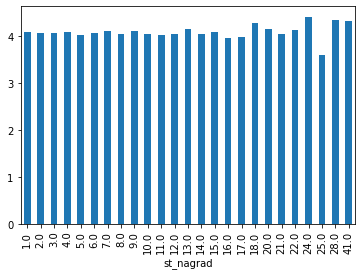

In [152]:
ocena_z_nagradami.plot.bar()